In [54]:
library(tidyverse)
library(ggridges)

df <- read.csv("data_consumo_agua.csv")

In [5]:
# Selecting variables
head(df)

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,159.72,2019,Gustavo A. Madero,42.56636,468.23,gustavo a. madero,7 de noviembre,53.24000,631.00,42.06667,3.05000,3,3.05,57250,alto,19.45526,-99.11266
2,0.00,2019,Gustavo A. Madero,35.93667,107.81,gustavo a. madero,7 de noviembre,0.00000,115.13,28.78250,7.32000,3,7.32,57253,medio,19.45526,-99.11266
3,0.00,2019,Gustavo A. Madero,24.58600,122.93,gustavo a. madero,7 de noviembre,0.00000,197.96,32.99333,75.03000,3,75.03,57255,popular,19.45572,-99.11358
4,0.00,2019,Gustavo A. Madero,0.00000,0.00,gustavo a. madero,nueva tenochtitlan,0.00000,253.53,84.51000,84.51000,3,253.53,57267,bajo,19.45965,-99.10447
5,56.72,2019,Azcapotzalco,67.43625,539.49,azcapotzalco,prohogar,56.72000,839.35,76.30455,121.57000,3,243.14,57330,bajo,19.47416,-99.14675
6,439.77,2019,Azcapotzalco,35.67577,927.57,azcapotzalco,trabajadores del hierro,54.97125,1399.67,37.82892,10.77667,3,32.33,57273,bajo,19.47861,-99.15057


In [6]:
dim(df)

[1] 71102    17

In [9]:
df <- df[,c(9,5,13,1,10,4,11,8,6,7,12,15:17)]

In [28]:
head(df)

,consumo_total,consumo_total_dom,consumo_total_no_dom,consumo_total_mixto,consumo_prom,consumo_prom_dom,consumo_prom_no_dom,consumo_prom_mixto,alcaldia,colonia,bimestre,indice_des,latitud,longitud
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,631.00,468.23,3.05,159.72,42.06667,42.56636,3.05000,53.24000,gustavo a. madero,7 de noviembre,3,alto,19.45526,-99.11266
2,115.13,107.81,7.32,0.00,28.78250,35.93667,7.32000,0.00000,gustavo a. madero,7 de noviembre,3,medio,19.45526,-99.11266
3,197.96,122.93,75.03,0.00,32.99333,24.58600,75.03000,0.00000,gustavo a. madero,7 de noviembre,3,popular,19.45572,-99.11358
4,253.53,0.00,253.53,0.00,84.51000,0.00000,84.51000,0.00000,gustavo a. madero,nueva tenochtitlan,3,bajo,19.45965,-99.10447
5,839.35,539.49,243.14,56.72,76.30455,67.43625,121.57000,56.72000,azcapotzalco,prohogar,3,bajo,19.47416,-99.14675
6,1399.67,927.57,32.33,439.77,37.82892,35.67577,10.77667,54.97125,azcapotzalco,trabajadores del hierro,3,bajo,19.47861,-99.15057


In [46]:
df %>% 
  group_by(indice_des) %>% 
  summarise(media= mean(consumo_total),
            maximo= max(consumo_total),
            minimo= min(consumo_total),
            quantil= quantile(consumo_total,0.75),.groups='drop')

indice_des,media,maximo,minimo,quantil
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
alto,2189.318,66650.92,0,2500.007
bajo,1476.408,72501.90,0,1629.720
medio,1357.347,85225.96,0,1517.950
popular,1821.516,119726.94,0,1643.850


In [34]:
outliers <- boxplot(df$consumo_total, plot=FALSE)$out
min(outliers)

[1] 4011.06

In [35]:
df %>% 
  group_by(indice_des) %>% 
  count(consumo_total>4011)

indice_des,consumo_total > 4011,n
<chr>,<lgl>,<int>
alto,FALSE,13626
alto,TRUE,1890
bajo,FALSE,27512
bajo,TRUE,1736
medio,FALSE,9218
medio,TRUE,581
popular,FALSE,14666
popular,TRUE,1873


### Histogramas simples de variables individuales

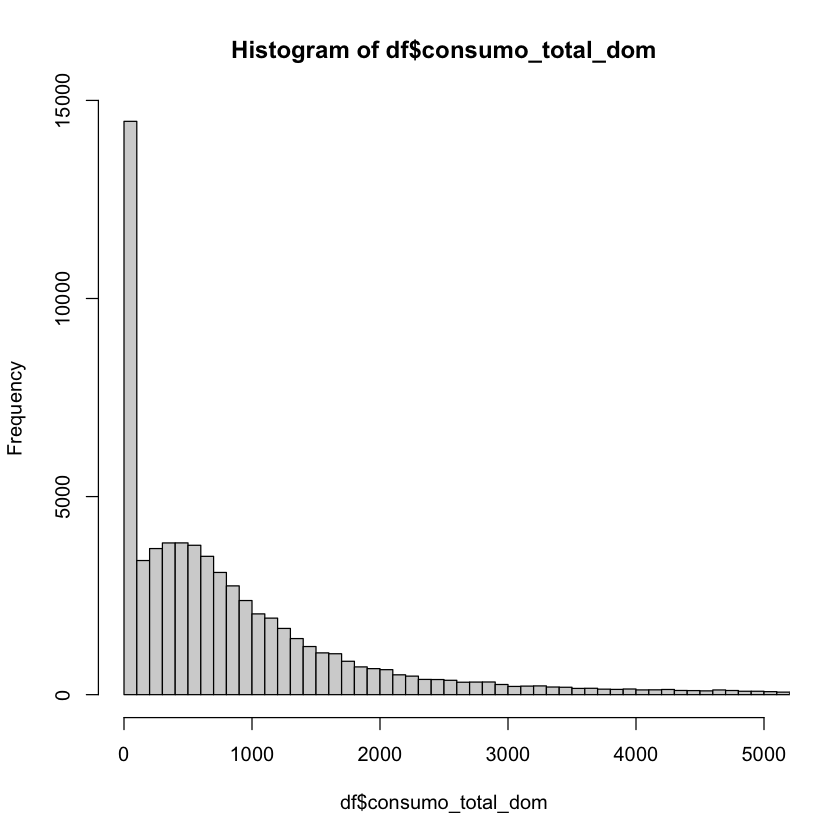

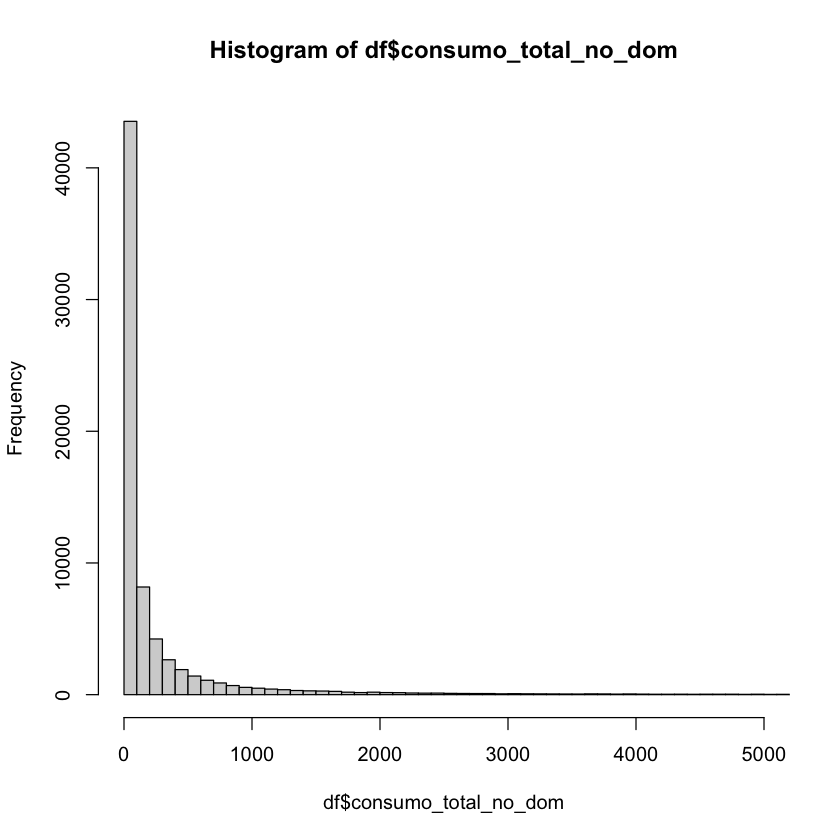

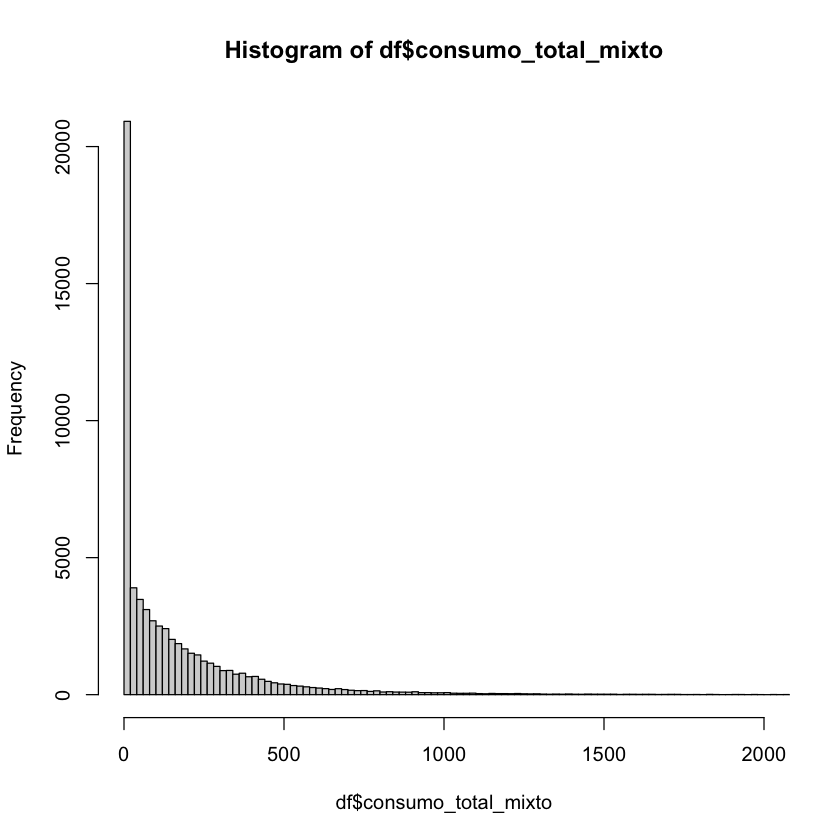

In [27]:
layout(1)

hist(df$consumo_total_dom,xlim=c(0,5000),breaks=1000)
hist(df$consumo_total_no_dom,xlim=c(0,5000),breaks=1000)
hist(df$consumo_total_mixto,xlim=c(0,2000),breaks=1000)

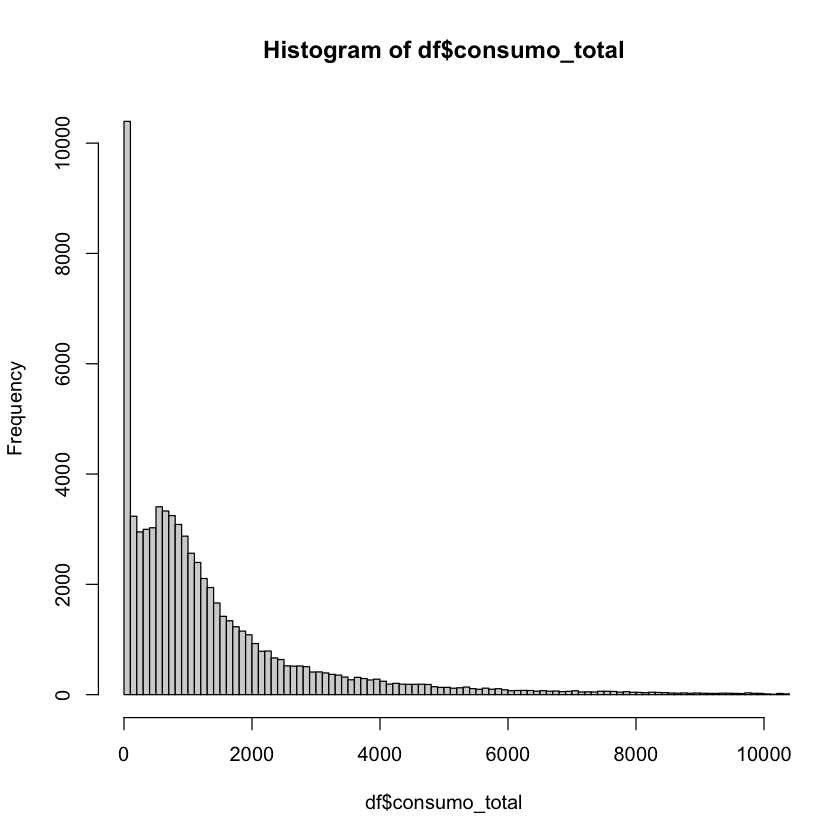

In [53]:
layout(1)
hist(df$consumo_total,xlim=c(0,10000),breaks=1000)

In [41]:
outliers2 <- boxplot(df$consumo_prom, plot=FALSE)$out
min(outliers2)

[1] 79.20135

In [57]:
clean_df <- na.omit(df)
clean_df %>% 
  group_by(alcaldia) %>% 
  summarise(media_total= mean(consumo_total),
            media_dom = mean(consumo_total_dom),
            media_no_dom = mean(consumo_total_no_dom),
            media_mixto = mean(consumo_total_mixto),.groups='drop')

alcaldia,media_total,media_dom,media_no_dom,media_mixto
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
alvaro obregon,2280.7289,1574.8744,556.46632,149.38817
azcapotzalco,2082.1395,1461.9823,385.02879,235.12840
benito juarez,2307.4696,1678.4965,437.82586,191.14715
coyoacan,1599.3728,1091.9116,421.36671,86.09458
cuajimalpa,3128.8120,2201.6368,737.31779,189.85751
cuauhtemoc,2582.3672,1487.9506,764.14966,330.26697
gustavo a. madero,1327.2781,922.6769,235.78146,168.81972
iztacalco,1836.9494,1373.2892,254.04193,209.61828
iztapalapa,847.8846,556.4839,194.23488,97.16581


In [58]:
sin_outliers <- clean_df %>% 
  filter(consumo_total<5000)
dim(sin_outliers)

[1] 58535    17

Picking joint bandwidth of 148



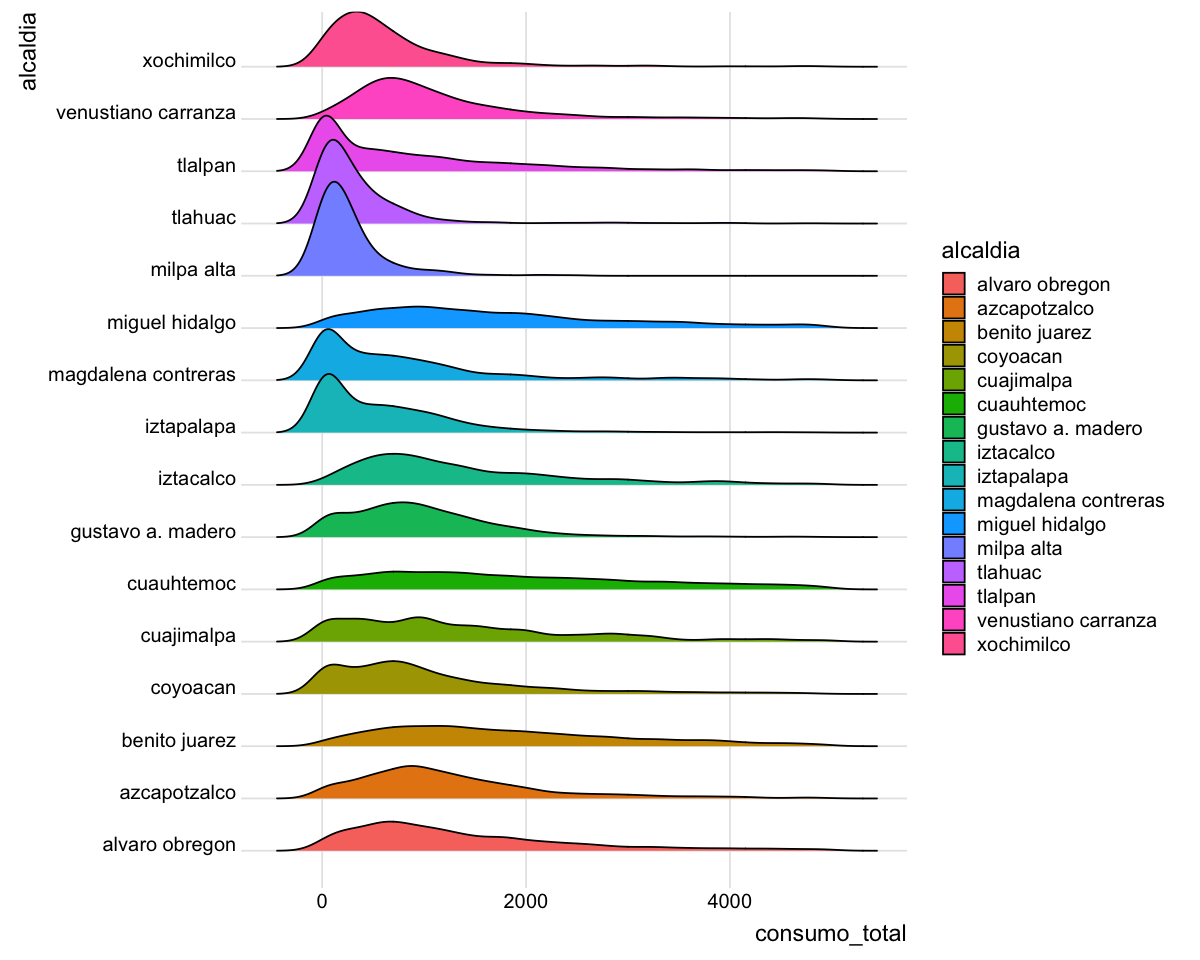

In [64]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(sin_outliers,aes(x=consumo_total, y=alcaldia, fill=alcaldia))+
  geom_density_ridges() +
  theme_ridges()

Picking joint bandwidth of 117



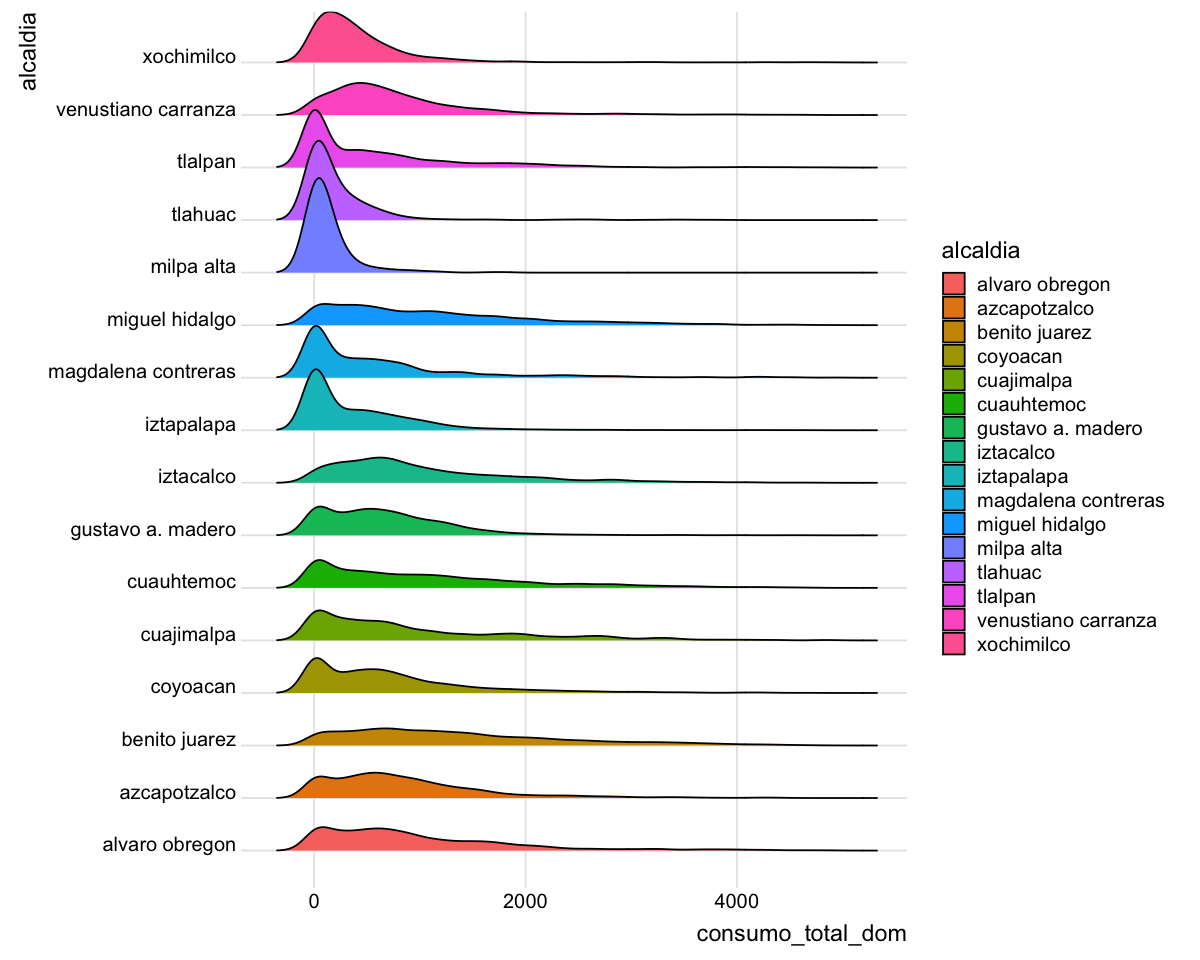

In [65]:
ggplot(sin_outliers,aes(x=consumo_total_dom, y=alcaldia, fill=alcaldia))+
  geom_density_ridges() +
  theme_ridges()

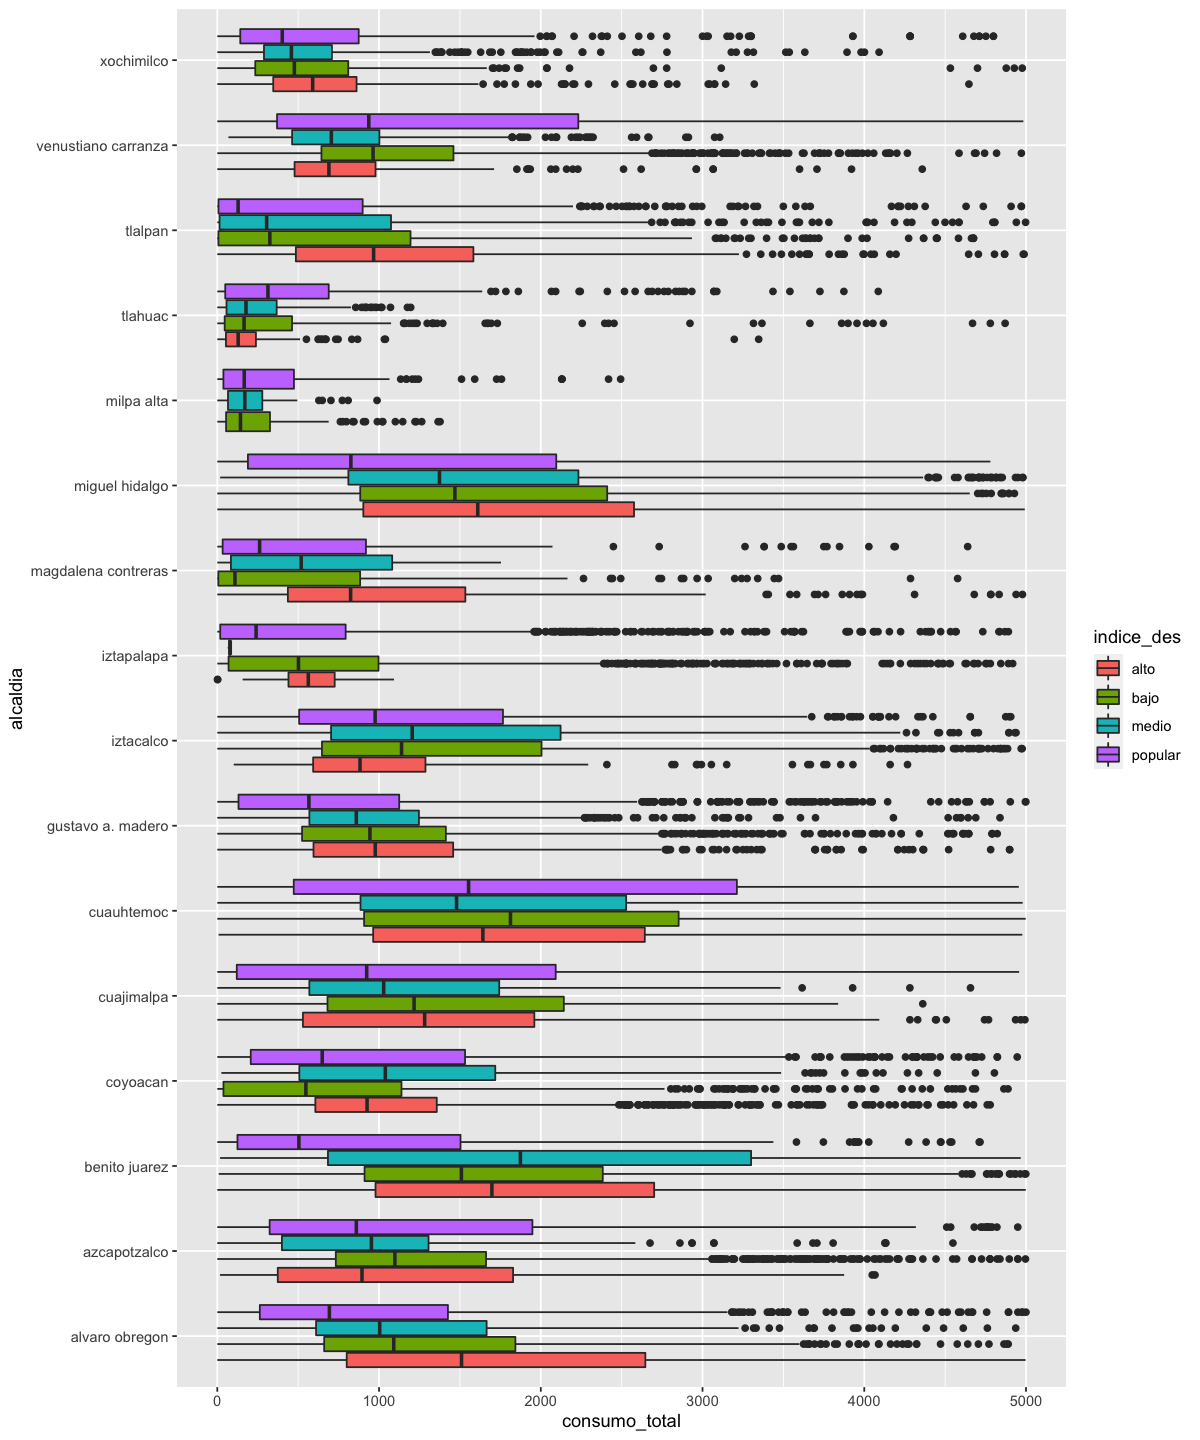

In [71]:
options(repr.plot.width=10, repr.plot.height=12)
ggplot(sin_outliers,aes(x=consumo_total,y=alcaldia,fill=indice_des))+
  geom_boxplot()

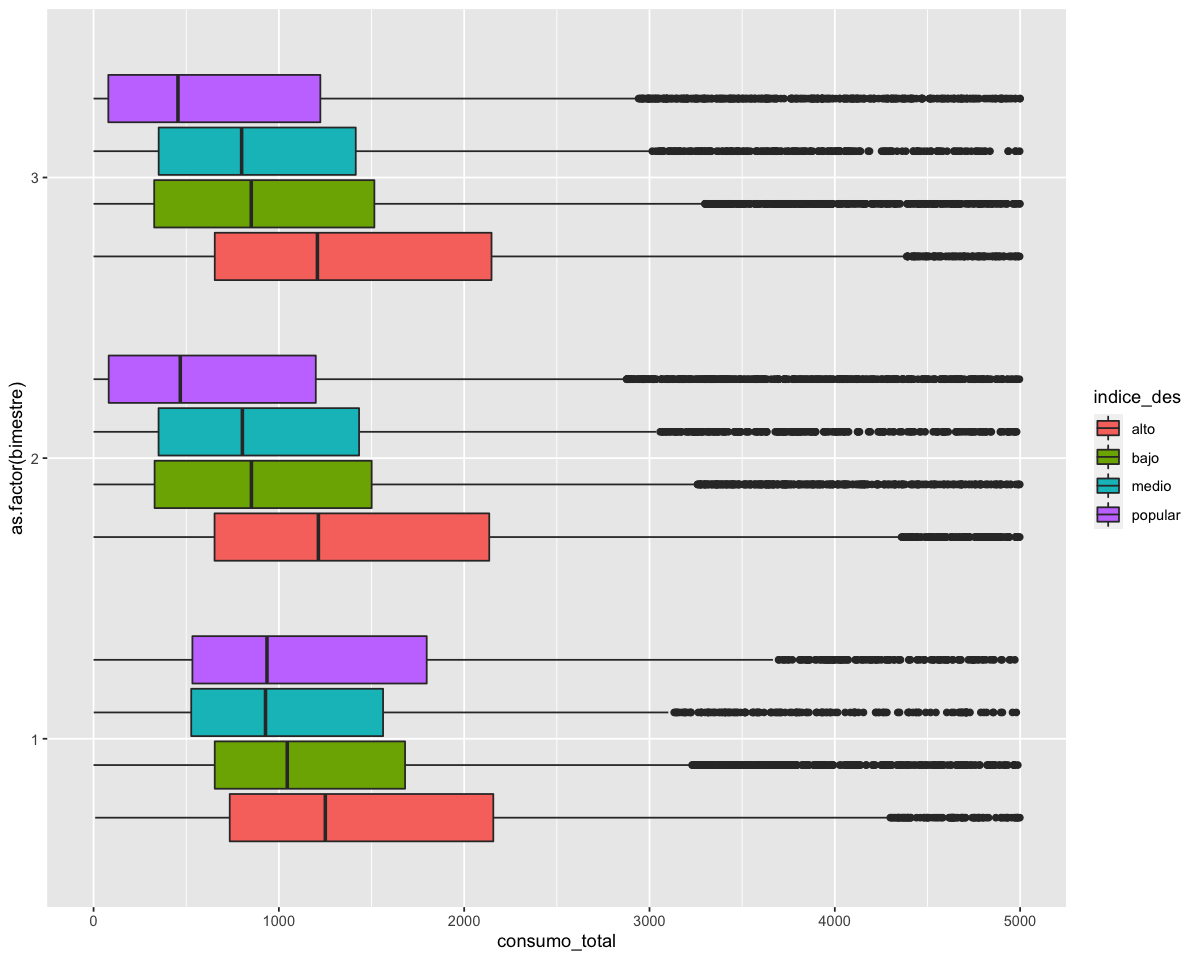

In [80]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(sin_outliers,aes(x=consumo_total,y=as.factor(bimestre),fill=indice_des))+
  geom_boxplot()

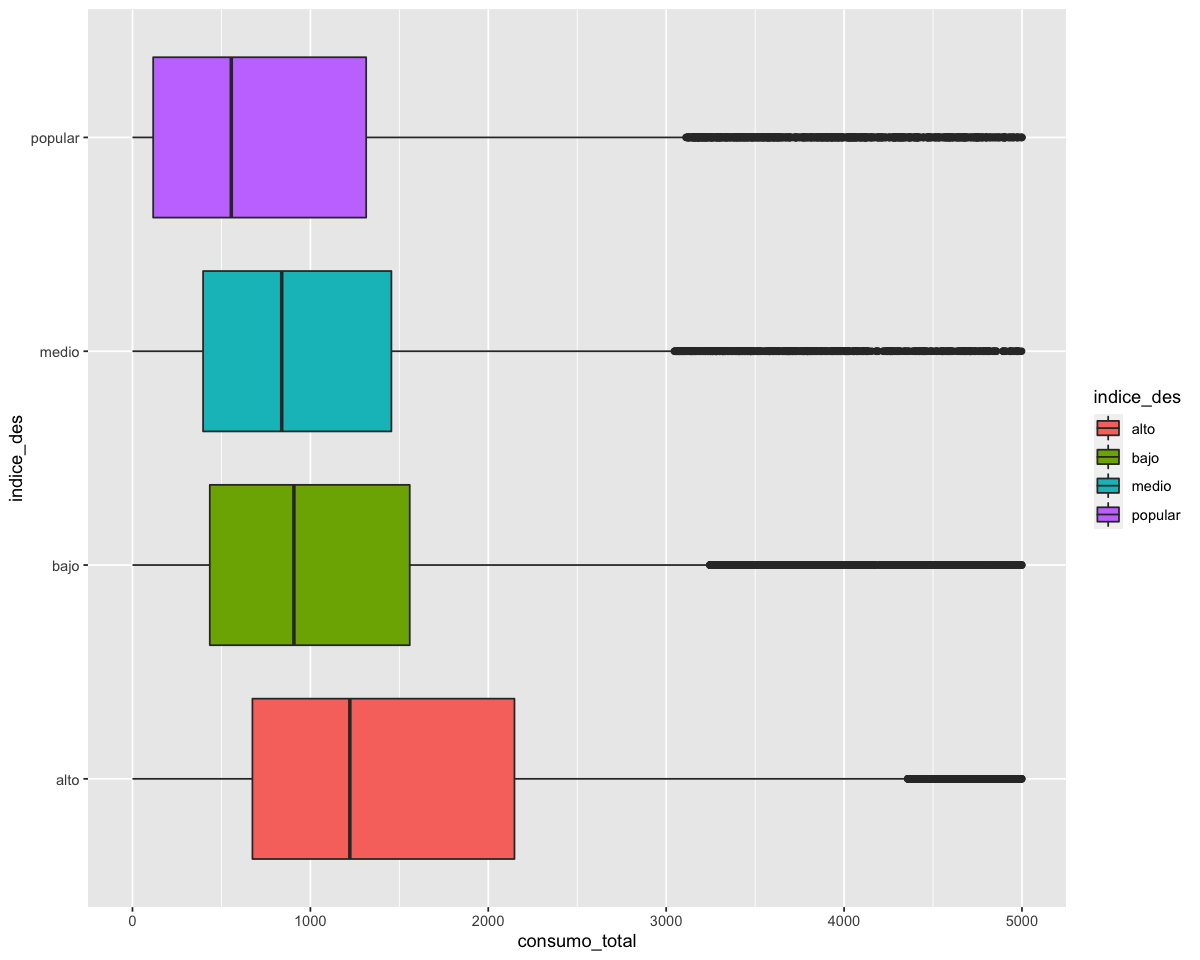

In [88]:
ggplot(sin_outliers,aes(x=consumo_total,y=indice_des,fill=indice_des))+
  geom_boxplot()

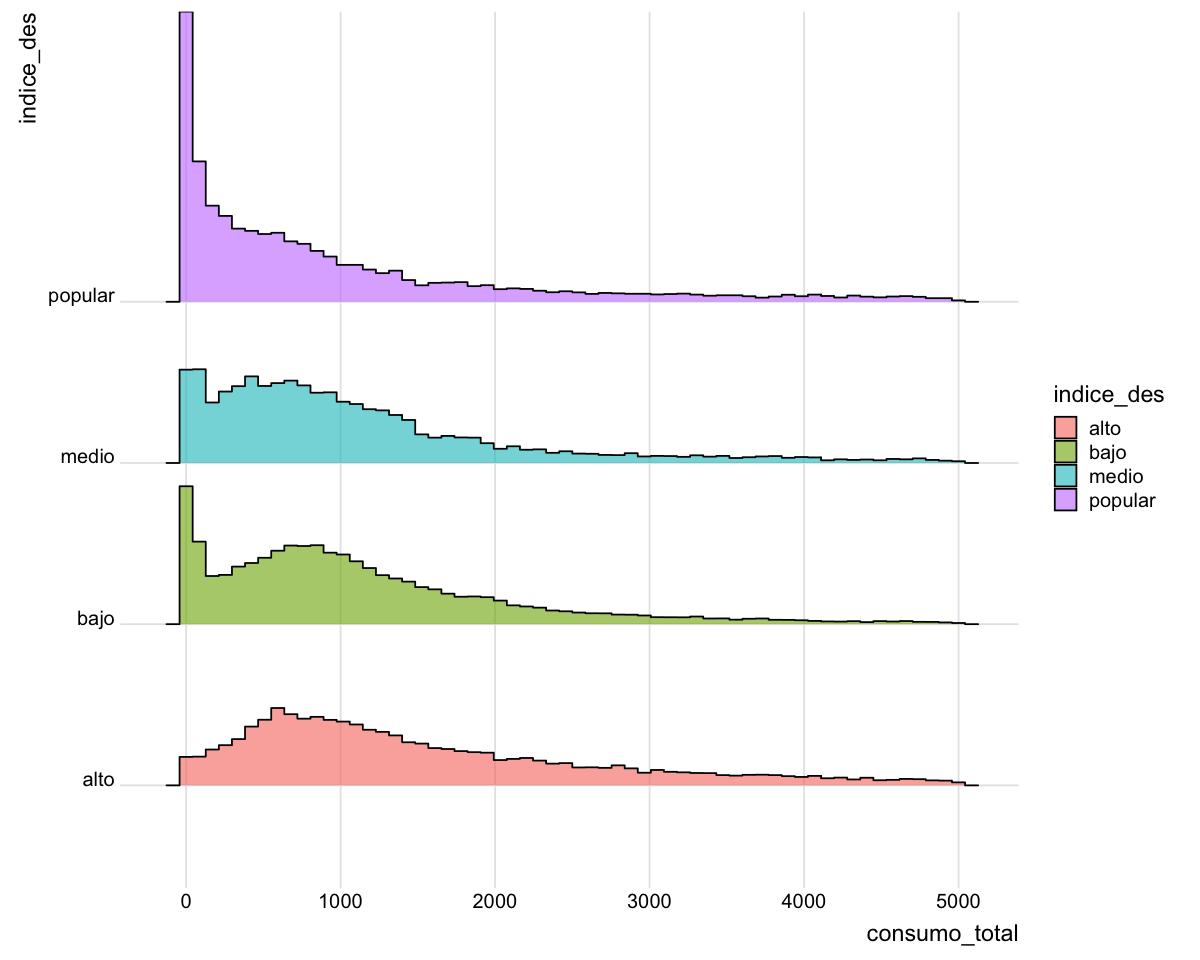

In [94]:
ggplot(sin_outliers,aes(x=consumo_total,y=indice_des,fill=indice_des))+
  geom_density_ridges(alpha=0.6, stat="binline", bins=60)  +
  theme_ridges()

Picking joint bandwidth of 122



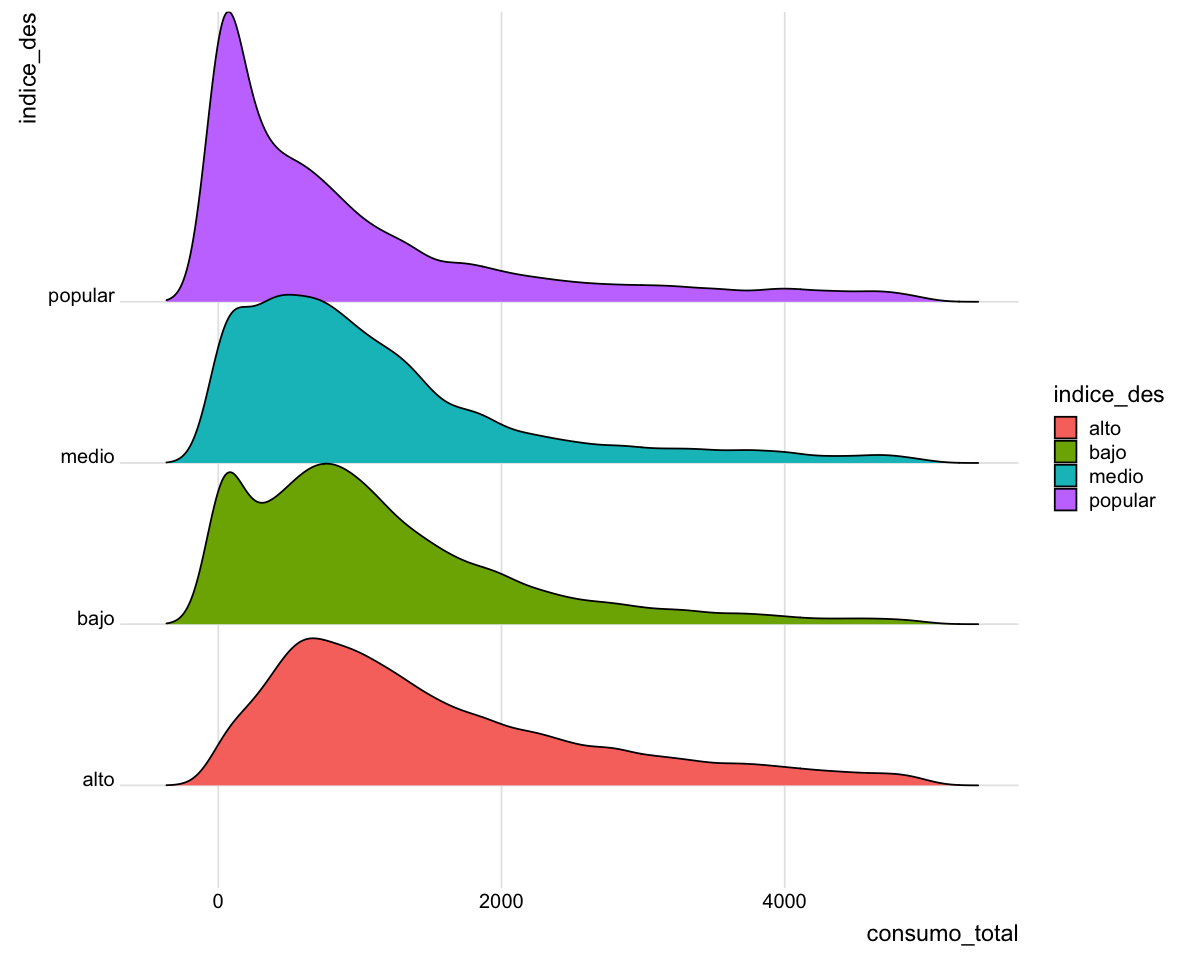

In [95]:
ggplot(sin_outliers,aes(x=consumo_total,y=indice_des,fill=indice_des))+
  geom_density_ridges()  +
  theme_ridges()